In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras import models

Using TensorFlow backend.


In [0]:
model = load_model('./endoscope_model_ver.82.50.h5')
print(model.summary())  












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_____________

In [0]:
img_path = './0a7bdce4-ac0d-44ef-93ee-92dfc8fe0b81.jpg'
from tensorflow.python.keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size = (150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0) # 향후 모델 인풋에서 배치차원을 위해 차원 늘려줌
img_tensor /= 255.

<h3>1. CNN과 max pooling 층에서 나오는 특성 맵을 그리는 법


In [0]:
layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)#각 activations의 출력 저장

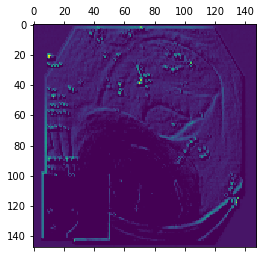

In [0]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(first_layer_activation[0, :, :, 19], cmap = 'viridis')

In [0]:
print(first_layer_activation.shape)

(1, 148, 148, 32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


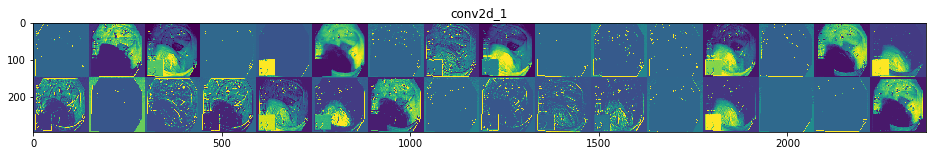

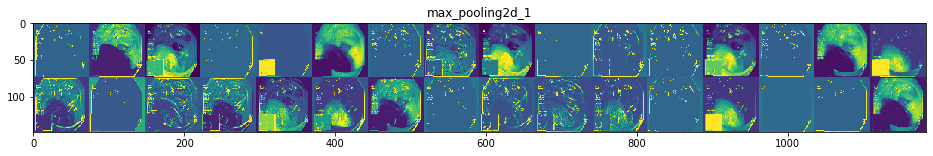

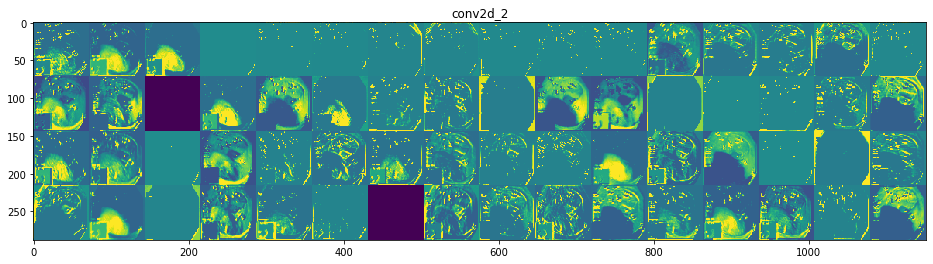

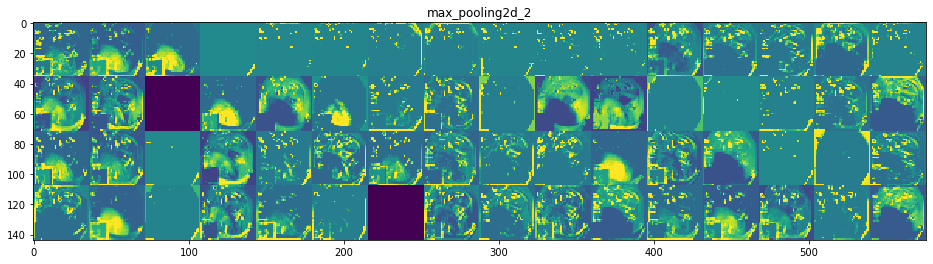

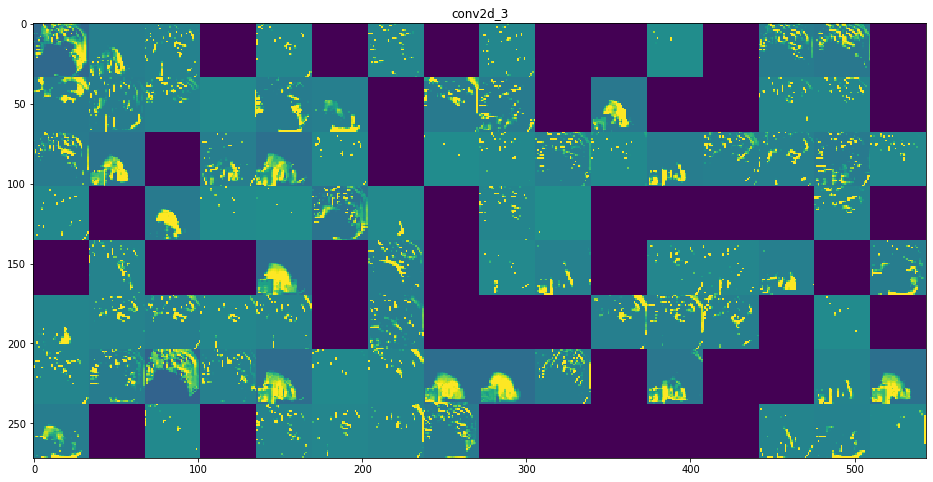

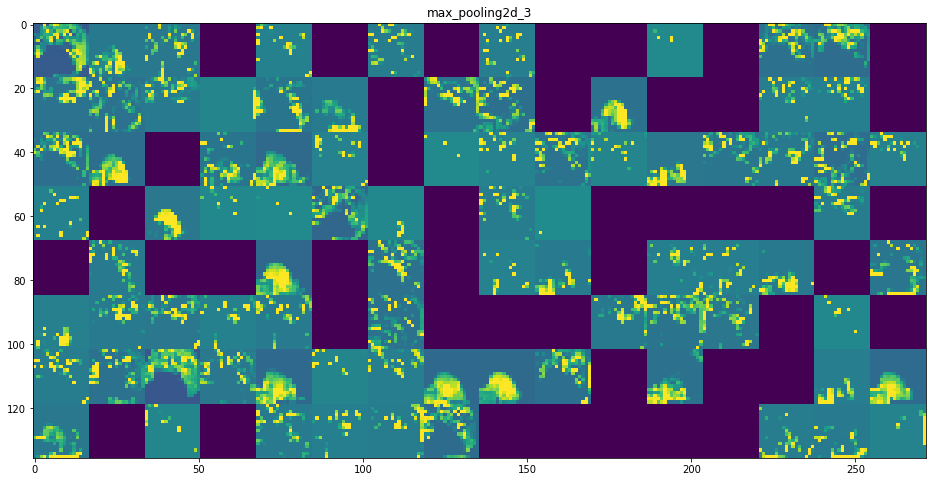

In [0]:
#- 모든 활성화에 있는 채널 시각화하기 : 논문에서 많이 보신 그림들이 어떻게 나오는 것인가 감을 잡을 수 있을 것입니다.
import keras
# 층의 이름을 그래프 제목으로
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

images_per_row = 16

# 여기서부터가 특징맵 출력하는 부분입니다.
for layer_name, layer_activation in zip(layer_names, activations):
    # 특징의 수를 뜻합니다.
    # 정확히 각 특징의 채널의 수라고 표현하면 이해가 쉽겠죠?
    n_features = layer_activation.shape[-1]

    # 특징맵의 크기는 (1, size, size, n_features)입니다., 1은 batch_size
    # layer_activation.shape[1]이 이미지의 width, height거든요.
    size = layer_activation.shape[1]

    # 활성화를 보여주기위한 grid를 정의합니다. 
    n_cols = n_features // images_per_row # 열의 갯수를 16개의 단위로 보여주고 싶어서입니다.
                                           #첫번째 층은 32개니 2개의 row로 나타나겟죠?
        
    #이미지가 들어가야할 픽셀 갯수라고 생각하시면 됩니다.
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 활성화를 채우는 부분.
    # 특성맵 갯수에 따른 행의 길이 : n_cols
    for col in range(n_cols):
        # 16개씩 채우면서.
        for row in range(images_per_row):
            # 모든 채널을 사용하겠다.
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 픽셀로 표현하기 위해.
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            # np.clip은 relu같은 느낌입니다. 0밑은 전부 0, 255 위는 전부 255로.
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [0]:
img_tensor.shape

(1, 150, 150, 3)

In [0]:
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

In [0]:
print(layer_names)

['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3']


In [0]:
images_per_row = 16

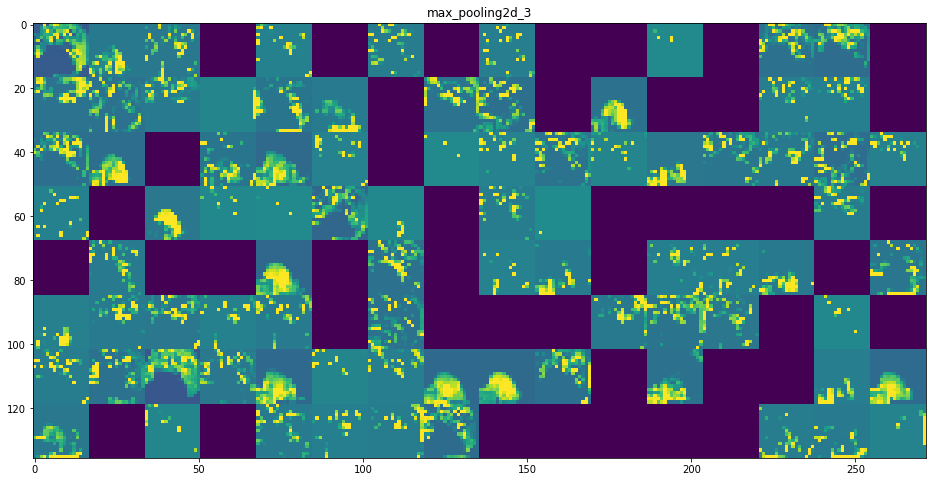

In [0]:
for layer_name, layer_activation in zip(layer_names, activations):   #layer names와 activations에 각각의 층마다의 깂을 저장

    n_features = layer_activation.shape[-1]  #feature의 개수를 추출하여 저장 ->actication
    size = layer_activation.shape[1]         #영상의 크기 저장

    n_cols = n_features // images_per_row    #몫을 저장
    display_grid = np.zeros((size * n_cols, images_per_row * size))    #영상의 픽셀 사이즈  size*col-> 가로  row*size->세로

for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]#추출하여 저장
            channel_image -= channel_image.mean()      
            channel_image /= channel_image.std()
            channel_image *= 64   #variation 일정하게->histogram equalization과 비슷
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

scale = 1. / size 
plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

<h3>2.필터가 반응하는 시각적 패턴

In [0]:
from keras import backend as K

model = model

layer_name = 'conv2d_1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

# 입력에 대한 손실의 그래디언트 구하기
grads = K.gradients(loss, model.input)[0]

# 그래디언트 정규화 ( 경사 상승법 과정을 부드럽게 하기 위하여 사용 )
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # 1e-5는 0 나눗셈 방지, 이를 gradient-clipping 이라고 함.

# 손실값과 그래디언트 값을 얻기 위함.
# 주어진 입력 이미지에 대해 손실 텐서와 그래디언트 텐서를 계산한다. 
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

# 확률적 경사 상승법을 사용한 손실 최대화하기
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step 


In [0]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [0]:
def generate_pattern(layer_name, filter_index, size = 150):
    # 주어진 층과 필터의 활성화를 최대화 하기위한 loss 정의
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    # grad clipping
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    # 입력 이미지에 대한 손실과 그래디언트 반환
    iterate = K.function([model.input], [loss, grads])
    # 회색이미지로 시작
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

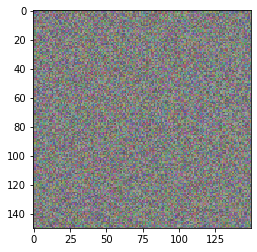

In [0]:
plt.imshow(generate_pattern('conv2d_1',0))

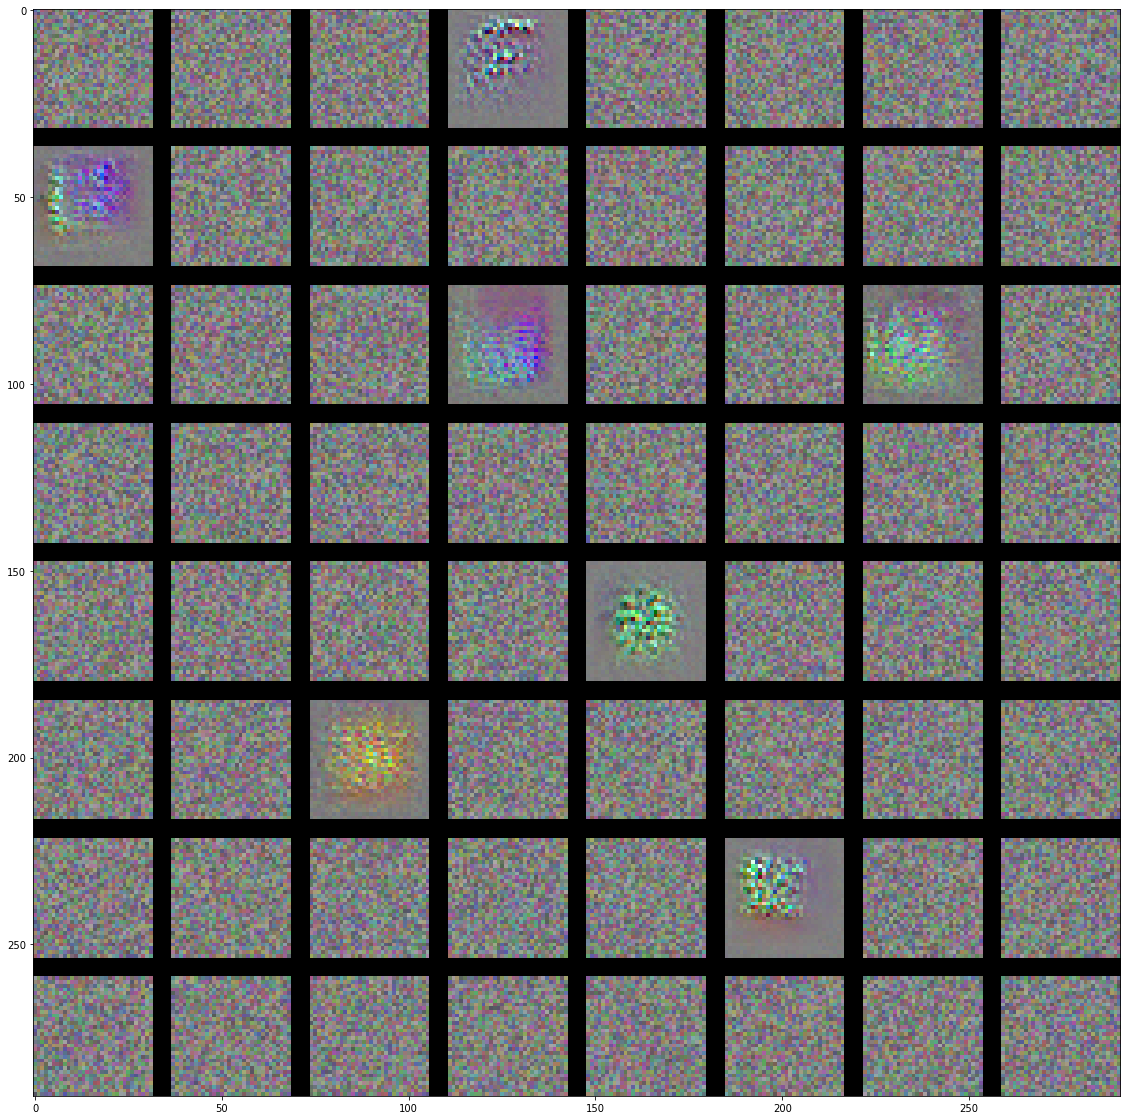

In [0]:
layer_name = 'conv2d_3'
size = 32
margin = 5

# 결과를 담은 빈 검은 이미지
results = np.zeros((8 * size + 7 * margin , 8 * size + 7 * margin, 3), dtype='uint8')

for i in range(8):
    for j in range(8):
        # layer_name에 있는 i + (j*8) 번째 필터에 대한 패턴 생성
        filter_img = generate_pattern(layer_name, i + (j * 8), size = size)
        
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start:horizontal_end, vertical_start: vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results)

<h3>3.원본 이미지에 heatmap을 그리는 방법

In [0]:
model = model

In [0]:
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import cv2

In [0]:
img_path = '/content/0a7bdce4-ac0d-44ef-93ee-92dfc8fe0b81.jpg'
img = image.load_img(img_path, target_size = (150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis= 0)
x = preprocess_input(x) 

In [0]:
from matplotlib import pyplot as plt
img=cv2.imread('/content/0a7bdce4-ac0d-44ef-93ee-92dfc8fe0b81.jpg')
#img=img.resize(105,500,3)
dst = cv2.resize(img, dsize=(150,150), interpolation=cv2.INTER_AREA)
dst.shape

(150, 150, 3)

In [0]:
dst=dst.reshape(1,150,150,3)
dst.shape

(1, 150, 150, 3)

In [0]:
predict = model.predict_classes(dst)
print(predict)

[5]


In [0]:
import tensorflow as tf

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())


    # 예측 벡터의 '아프리카 코끼리' 항목
    virtual_piano_output = model.output[:, 2]
    
    # VGG16의 마지막 합성곱 층인 block5_conv3 층의 특성 맵
    last_conv_layer = model.get_layer('conv2d_7')

    # block5_conv3의 특성 맵 출력에 대한 '아프리카 코끼리' 클래스의 그래디언트
    grads = K.gradients(virtual_piano_output, last_conv_layer.output)[0]

    # 특성 맵 채널별 그래디언트 평균 값이 담긴 (512,) 크기의 벡터
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    # 샘플 이미지가 주어졌을 때 방금 전 정의한 pooled_grads와 block5_conv3의 특성 맵 출력을 구합니다
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    # 두 마리 코끼리가 있는 샘플 이미지를 주입하고 두 개의 넘파이 배열을 얻습니다
    pooled_grads_value, conv_layer_output_value = iterate([x])

    # "아프리카 코끼리" 클래스에 대한 "채널의 중요도"를 특성 맵 배열의 채널에 곱합니다
    for i in range(32):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # 만들어진 특성 맵에서 채널 축을 따라 평균한 값이 클래스 활성화의 히트맵입니다
    heatmap = np.mean(conv_layer_output_value, axis=-1)

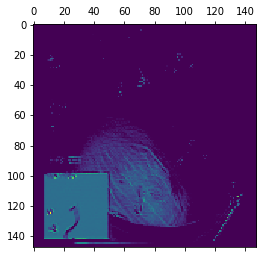

In [0]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()